###### My Topics:

1) Internet subscription at home<br/>
2) Online dating<br/>
3) Why one doesnot use smartphone<br/>
4) Cable connection and net subscription<br/>
5) Voilent games

<b>My Questions :<br/>
1.1) Are people with high income more likely to have internet subscription at home as compared to people with low income?<br/><br/>
1.2) Are people with more education more likely to have internet subscription at home as compared to people with low education?<br/><br/>
2)   Do people with high education think that online dating keeps people from settling down? <br/><br/>
3)   Why do most graduates and above dont use smartphones<br/><br/>
4)   Are people with high speed connection not likely to have tv connection at home ?<br/><br/>
5)   Do women and men hold varying opinion about voilence induced by violent games?<br/> </b><br/>

# Preprocessing  : Data cleaning and Munging

###### Load all the required libraries

In [1]:
library(dplyr)
library(purrr)
library(tidyr)
library(ggplot2)
library(broom)
library(magrittr)
library(RSQLite)
library(reshape2)
library(jsonlite)
library(knitr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'purrr'

The following objects are masked from 'package:dplyr':

    contains, order_by


Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

The following object is masked from 'package:purrr':

    set_names


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths


Attaching package: 'jsonlite'

The following object is masked from 'package:purrr':

    flatten



######  Steps : Cleaning and Munging <br/>
1) Read data from csv<br/><br/>
2) Rename columns for better redability : <br/><br/>
&emsp;&emsp;&emsp;      sampleid=ï..psraid<br/><br/>
&emsp;&emsp;&emsp;      Internet_Service_at_Home=home4nw<br/><br/>
&emsp;&emsp;&emsp;      Type_of_Net=bbhome1<br/><br/>
&emsp;&emsp;&emsp;      Television_Connection=cable2<br/><br/>
&emsp;&emsp;&emsp;      Education_Level=educ2<br/><br/>
&emsp;&emsp;&emsp;      NoSmartPhones=q4<br/><br/>
&emsp;&emsp;&emsp;      Violentgames=game3b<br/><br/>
&emsp;&emsp;&emsp;      OnlineDatingA=date4a<br/><br/>
3) Change all columns containing integers to factors.<br/><br/>

In [2]:
library(dplyr)
GJB <- read.csv(file="GJBCSV.csv", header=TRUE) #Read data from csv
summary(GJB)   # as in Brooklyn example to have a quick look
gjbfactorize=GJB %>%
rename(sampleid=ï..psraid)%>%
rename(Internet_Service_at_Home=home4nw)%>%
rename(Type_of_Net=bbhome1)%>%
rename(Television_Connection=cable2)%>%
rename(Education_Level=educ2)%>%
rename(NoSmartPhones=q4)%>%
rename(Violentgames=game3b)%>%
rename(OnlineDatingA=date4a)
# %>%
# mutate_if(is.integer,as.factor)    #Change all columns containing integers to factors.
# head(gjbfactorize)

   ï..psraid          sample        int_date          lang       usr    
 Min.   :100006   Min.   :1.00   Min.   :61015   Min.   :1.000   R:375  
 1st Qu.:102765   1st Qu.:1.00   1st Qu.:62115   1st Qu.:1.000   S:971  
 Median :201182   Median :2.00   Median :62415   Median :1.000   U:655  
 Mean   :167354   Mean   :1.65   Mean   :63683   Mean   :1.051          
 3rd Qu.:203261   3rd Qu.:2.00   3rd Qu.:62915   3rd Qu.:1.000          
 Max.   :205508   Max.   :2.00   Max.   :71215   Max.   :2.000          
                                                                        
    cregion          state            form            sex       
 Min.   :1.000   Min.   : 1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:13.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :3.000   Median :29.00   Median :2.000   Median :2.000  
 Mean   :2.667   Mean   :28.82   Mean   :1.515   Mean   :1.506  
 3rd Qu.:3.000   3rd Qu.:42.00   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :4.000   Max.   :5

## clean/format the data with regular expressions

In [3]:
# names(gjbfactorize) <- tolower(names(gjbfactorize))
gjbfactorize$Internet_Service_at_Home<-as.numeric(gsub("[^[:digit:]]","",gjbfactorize$Internet_Service_at_Home))
gjbfactorize$sampleid<-as.numeric(gsub("[^[:digit:]]","",gjbfactorize$sampleid))
gjbfactorize$Type_of_Net<-as.numeric(gsub("[^[:digit:]]","",gjbfactorize$Type_of_Net))
gjbfactorize$Violentgames<-as.numeric(gsub("[^[:digit:]]","",gjbfactorize$Violentgames))
gjbfactorize$OnlineDatingA<-as.numeric(gsub("[^[:digit:]]","",gjbfactorize$OnlineDatingA))

In [4]:
gjbfactorize=mutate_if(gjbfactorize,is.numeric,as.factor)   # Change the data to factor
gjbfactorize=mutate_if(gjbfactorize,is.integer,as.factor)  

######  Make label variables to assign to different levels , as answers to questions asked

In [5]:
a <- c("1"="Excellent","2"="Good","3"="Only fair","4"="Poor","8"="Don't know","9"="Refused")
b<-c("1"="Yes","2"="No","8"="Dont know","9"="Refused")
d <- c("1"="Almost constantly","2"="Several times a day","3"="About once a day","4"="Several times a week","5"="Less often","8"="Don't know","9"="Refused")
e <- c("1"="Less than $10,000","2"="10 to under $20,000","3"="20 to under $30,000","4"="30 to under $40,000","5"="40 to under $50,000","6"="50 to under $75,000","7"="75 to under $100,000","8"="100 to under $150,000","9"="$150,000 or more","98"="Don't know","99"="Refused")
#we have clubbed Two year associate degree and University degree to a group College or university. And  Some postgraduate no degree and Post graduate to college graduate +
f<-  c("1"="Less than high school ","2"="High school incomplete","3"="High school graduate","4"="Some college","5"="Degree Four and Two year","6"="Degree Four and Two year","7"="Above college graduate","8"="Above college graduate","98"="Don't know","99"="Refused")
g<-c("1"="Agree","2"="Disagree","8"="Dont know","9"="Refused")
h<-c("1"="Male","2"="Female")
i<-c("1"="Don’t need one","2"="Too expensive (general)","3"="complicated","4"="not interested","5"="PHONE is too expensive","6"="DATA plan is too expensive","7"="Happy with current phone","8"="Only use phone for calling","9"="Plan to get one","10"="No reason","11"="Prefer to be less connected","12"="Don’t know what it is","13"="Worried about radiation","14"="Worried about privacy or tracking","97"="Other","98"="Dont Know","99"="Refused")
j<-c("younger (18-29)", "middle younger (30-49)","middle older (50-64)", "older (65+)")
k<-c("1"="Dial-up","2"="Higher-speed","3"="Both ","4"="use Cellphone","5"="No internet access","8"="Dont know","9"="Refused")


###### Assign name to levels of values of required columns as stated above, for better redability, since answers are encoded as integers.

In [6]:
levels(gjbfactorize$Internet_Service_at_Home)=b
levels(gjbfactorize$inc)=e
levels(gjbfactorize$Education_Level)=f
levels(gjbfactorize$OnlineDatingA)=g
levels(gjbfactorize$sex)=h
levels(gjbfactorize$NoSmartPhones)=i
gjbfactorize$age = findInterval(GJB$age, c(29, 49, 64))
gjbfactorize$age_Interval = factor(gjbfactorize$age,labels = c("younger (18-29)", "middle younger (30-49)","middle older (50-64)", "older (65+)"))
levels(gjbfactorize$Type_of_Net)=k
levels(gjbfactorize$Television_Connection)=b
levels(gjbfactorize$Violentgames)=g

# Q1 : Are people with high income more likely to have internet subscription at home as compared to people with low income?

######  Steps : Cleaning and Munging <br/>
1) Select only the required columns:  Income / Sample id / Internet_Service_at_Home<br/><br/>
2) Filter the data with people who have internet connection ( Internet_Service_at_Home=="Yes"), and who didnot answer about their income( inc!= "Refused", inc!="Don't know")<br/><br/>
3) Group the columns and count the number of people who have Internet connection and who answered about their income, and count the data in each group.

In [7]:
Internet_with_income=select(gjbfactorize,sampleid,inc,Internet_Service_at_Home)%>%
filter(inc!= "Refused", inc!="Don't know" ) %>%
group_by(Internet_Service_at_Home,inc)%>%
summarise(count=n())
Internet_with_income=Internet_with_income[Internet_with_income$Internet_Service_at_Home == "Yes",]

We plot the data to have a quick visualization and analysis

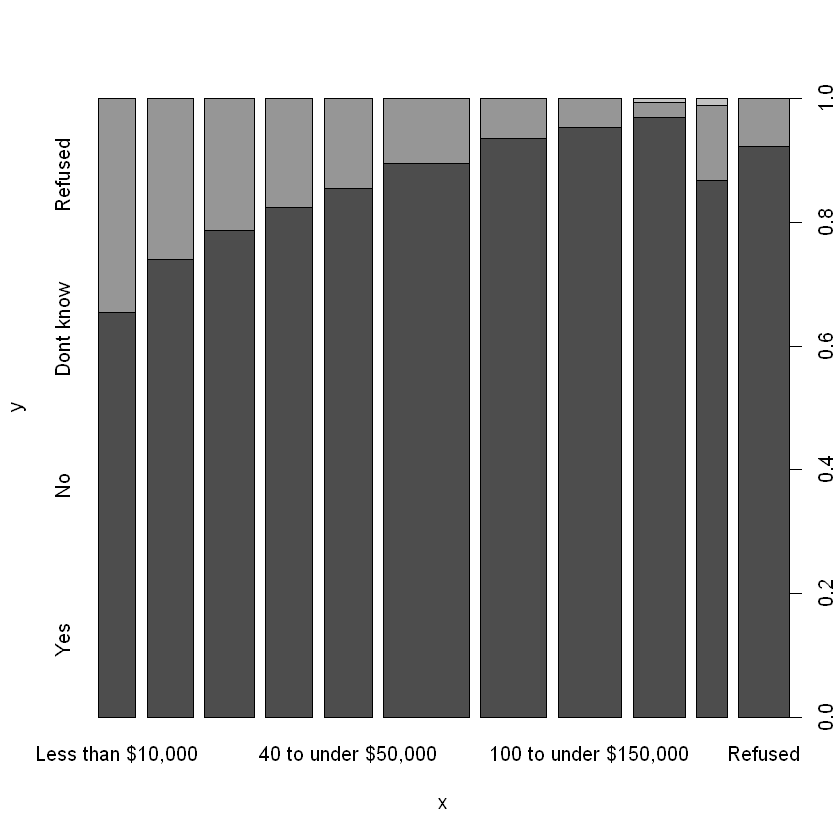

In [8]:
plot(gjbfactorize$inc,gjbfactorize$Internet_Service_at_Home)

Since the sample size of people who answered about internet connection is different for each catogery of income, I have
equalized the sample size in hundreds by analysing data on percentage. <br/><br/>
That is to say, my data speaks -> what percent of people with income in each catogery individually have internet access at home<br/>
For instance : 47% of people with income level less than $10,000 have Internet access at home and so on

In [9]:
total=gjbfactorize$Internet_Service_at_Home%>%
na.omit()
total_answered=length(total)
percentageAnswered=select(gjbfactorize,sampleid,inc,Internet_Service_at_Home)%>%
group_by(inc)%>%
summarise(countGrp=n())%>%
right_join(Internet_with_income,by="inc")%>%
mutate(percentage=((count * 100 )/countGrp))
percentageAnswered$percentage<-round(percentageAnswered$percentage)

head(percentageAnswered)

inc,countGrp,Internet_Service_at_Home,count,percentage
"Less than $10,000",157,Yes,74,47
"10 to under $20,000",187,Yes,102,55
"20 to under $30,000",180,Yes,118,66
"30 to under $40,000",165,Yes,117,71
"40 to under $50,000",164,Yes,124,76
"50 to under $75,000",275,Yes,231,84


###### Plot the data as bar chart, each bar stating what percent of individuals in each catogery have Internet access at home

Warning message:
"Removed 9 rows containing missing values (position_stack)."Warning message:
"Removed 9 rows containing missing values (geom_text)."

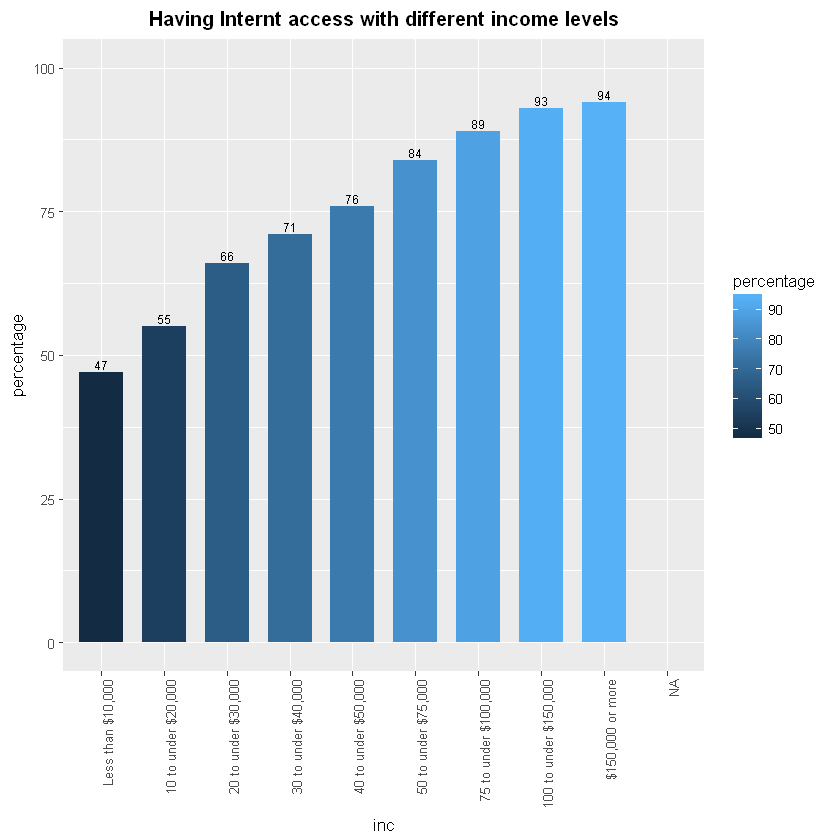

In [10]:
# ggplot(data=percentageAnswered, aes(x=inc, y=percentage,fill=percentage,width=.7),cex.names=0.20) +
# geom_bar(stat="identity")+
# coord_cartesian(ylim=c(0,100))+
# geom_text(aes(label=percentage), vjust=-0.3, size=2.5)+
# theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))
ggplot(data=percentageAnswered, aes(x=inc, y=percentage,fill=percentage,width=.7),cex.names=0.20) +
geom_bar(stat="identity")+
coord_cartesian(ylim=c(0,100))+
geom_text(aes(label=percentage), vjust=-0.3, size=2.5)+
theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))+ 
ggtitle("Having Internt access with different income levels") + 
theme(plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))

#### Description: <br/>
Percent of people with income in each catogery individually that have internet access at home<br/>
For instance : 47% of people with income level less than $10,000 have Internet access at home and so on.

#### Hypothesis :
People with higher income are more likely to have internet connection at home. Its evident from the graph that it increases linearly, as more the income , more the is ones potentiality to have internet access.


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#  Q1.2) Are people with more education more likely to have internet subscription at home as compared to people with low education?


######  Steps : Cleaning and Munging <br/>
1) Select only the required columns:  Education_Level / Sample id / Internet_Service_at_Home<br/><br/>
2) Filter the data with people who have internet connection ( Internet_Service_at_Home=="Yes"), and who didnot answer about their Education Level( Education_Level!= "Refused", Education_Level!="Don't know")<br/><br/>
3) Group the columns and count the number of people who have Internet connection and who answered about their income, and count the data in each group.

In [11]:
Internet_with_Education_Level=select(gjbfactorize,sampleid,Education_Level,Internet_Service_at_Home)%>%
filter(Internet_Service_at_Home=="Yes", Education_Level!= "Refused", Education_Level!="Don't know" ) %>%
group_by(Internet_Service_at_Home,Education_Level)%>%
summarise(count=n())

We do a similar analysis by so as to speak : <br/>
36% of people with education level less than high school have Internet access at home and so on

Education_Level,countGrp,Internet_Service_at_Home,count,percentage
Less than high school,66,Yes,24,36
High school incomplete,86,Yes,40,47
High school graduate,483,Yes,277,57
Some college,340,Yes,260,76
Degree Four and Two year,593,Yes,520,88
Above college graduate,413,Yes,373,90


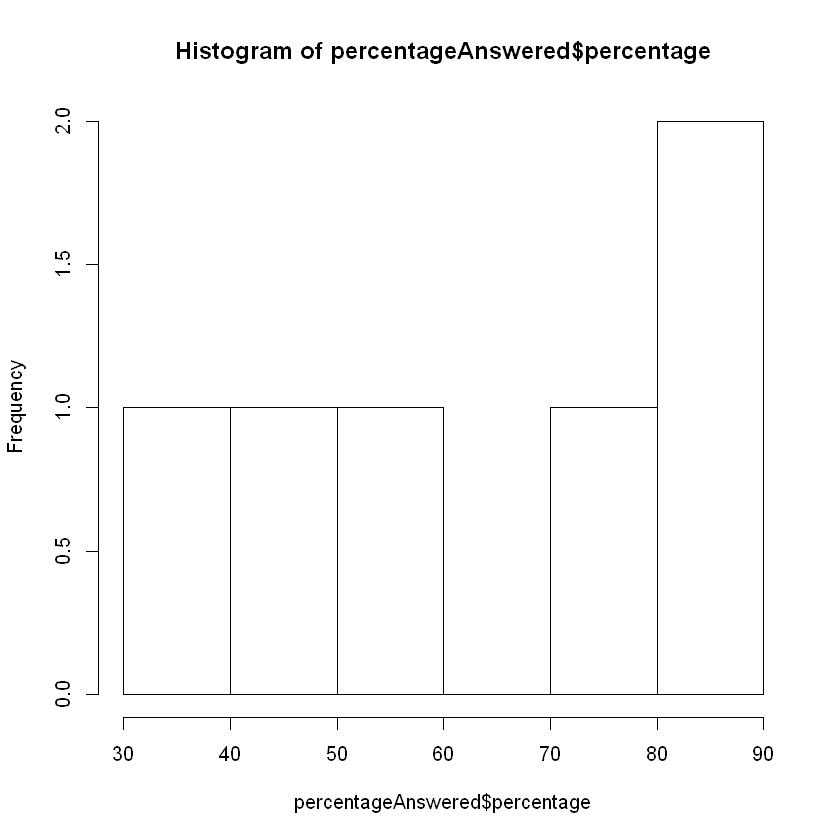

In [12]:
total=gjbfactorize$Internet_Service_at_Home%>%
na.omit()
total_answered=length(total)
percentageAnswered=select(gjbfactorize,sampleid,Education_Level,Internet_Service_at_Home)%>%
group_by(Education_Level)%>%
summarise(countGrp=n())%>%
right_join(Internet_with_Education_Level,by="Education_Level")%>%
mutate(percentage=((count * 100 )/countGrp))
percentageAnswered$percentage<-round(percentageAnswered$percentage)

head(percentageAnswered) 
hist(percentageAnswered$percentage)

We plot the above histogram to have a quick analysis of percentage spread of data

###### Plot the data as bar chart, each bar stating what percent of individuals in each catogery have Internet access at home

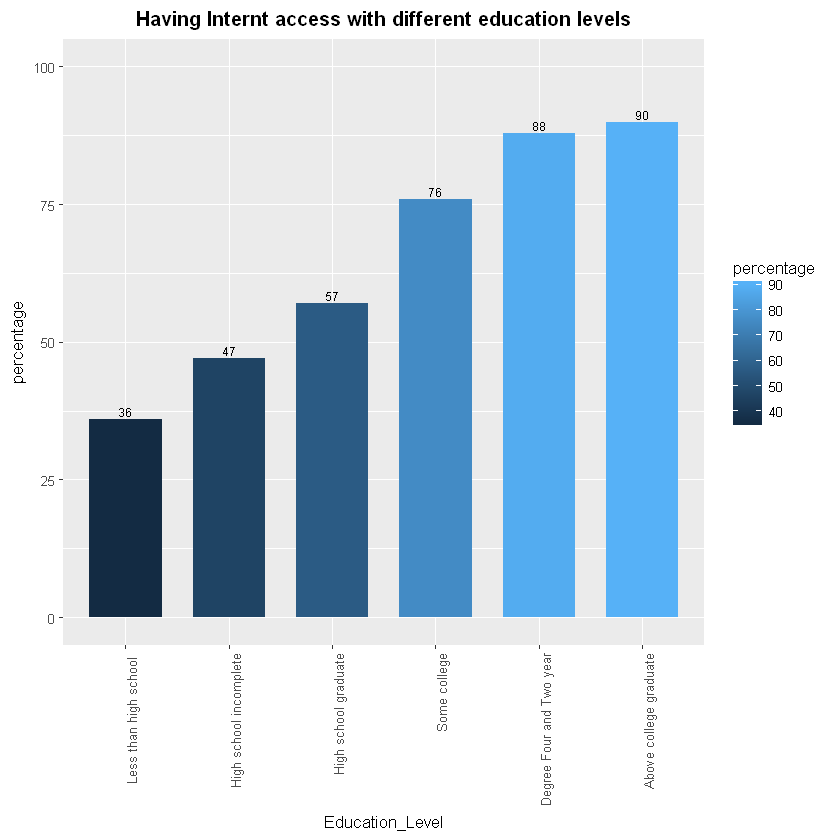

In [13]:
ggplot(data=percentageAnswered, aes(x=Education_Level, y=percentage,fill=percentage,width=.7),cex.names=0.20) +
geom_bar(stat="identity")+
coord_cartesian(ylim=c(0,100))+
geom_text(aes(label=percentage), vjust=-0.3, size=2.5)+
theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))+ 
ggtitle("Having Internt access with different education levels") + 
theme(plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))

#### Description: <br/>
Percent of people with income in each catogery individually that have internet access at home<br/>
For instance : 36% of people with education level less than high school have Internet access at home and so on.

#### Hypothesis :
People with higher education are more likely to have internet connection at home. Its evident from the graph that it increases linearly, as more the education , more the is ones requrirement to have internet access.

#### I have plotted the same graph as line chart to better visualize the linear increase.


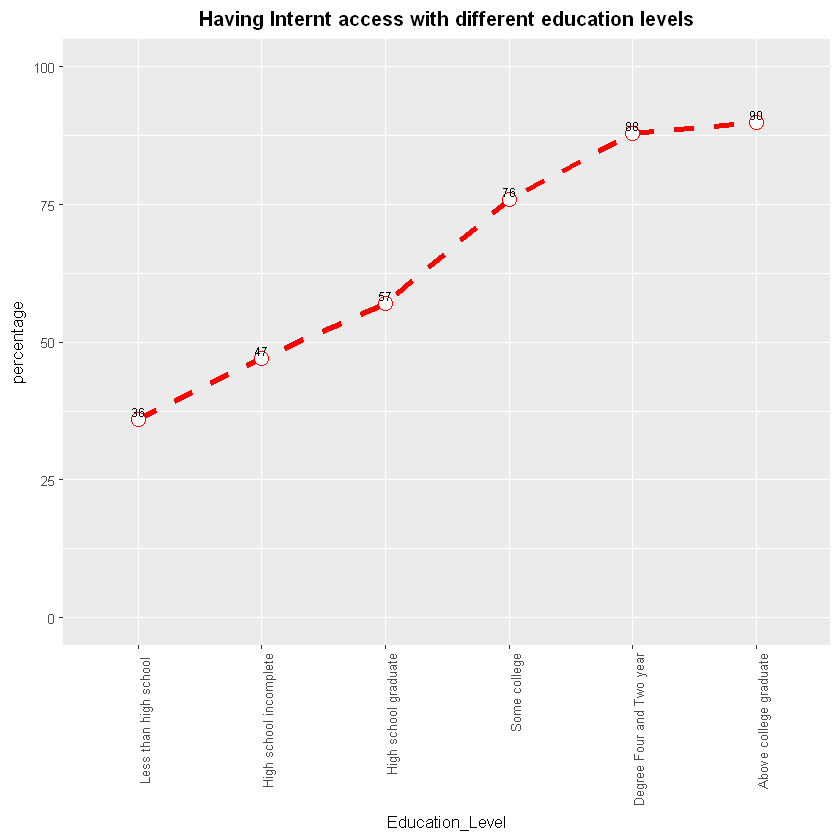

In [14]:
ggplot(data=percentageAnswered, aes(x=Education_Level, y=percentage,group=1),cex.names=0.20) +
geom_line(stat="identity",linetype="dashed", size=1.5,colour="red",)+
geom_point(colour="red", size=4, shape=21, fill="white")+
coord_cartesian(ylim=c(0,100))+
geom_text(aes(label=percentage), vjust=-0.3, size=2.5)+
theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))+ 
ggtitle("Having Internt access with different education levels") + 
theme(plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))

#### Description: <br/>
Percent of people with income in each catogery individually that have internet access at home<br/>
For instance : 36% of people with education level less than high school have Internet access at home and so on.

#### Hypothesis :<br/>
More the individuals get educated, more likely they are to have internet subscrption at home. Most preferably college graduates.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Q2 Do people with high education think that online dating keeps people from settling down? <br/><br/>

Steps : <br/>
1)Getting the number of people who answered to online dating to carry out a percentage analysis. <br/>
2)Cleaning the data by omitting NA

In [15]:
total=gjbfactorize$OnlineDatingA%>%
na.omit()
total_answered=length(total)
total_answered

[1] 2001

######  Steps : Cleaning and Munging <br/>
1) Select only the required columns:  Income / Sample id / OnlineDatingA/ Education_Level<br/><br/>
2) Filter the data with people who disagree with the statement that online dating dating keeps people from settling down because they always have options for people to date  (OnlineDatingA=="Disagree),<br/><br/>
3) Group the columns and count the number of people who have agreed and who answered about their eduacation level, and count the data in each group.<br/><br/>
4) Clean the data by removing the people who haven't answered about their education level.

In [16]:
OnlinedatingOpinionAgree=select(gjbfactorize,sampleid,Education_Level,OnlineDatingA)%>%
filter(OnlineDatingA=="Disagree") %>%
na.omit()%>%
group_by(Education_Level,OnlineDatingA)%>%
summarise(count=n())


Since the sample size of people who answered about Online dating is different for each catogery of education level, I have equalized the sample zide in hundreds by analysing data on percentage. <br/><br/>
That is to say, my data speaks -> what percent of people with education in each catogery individually have agreed to the opinion<br/>
For instance : 36% of people with education less than high school disagree to the opinion.

In [17]:
total=gjbfactorize$OnlinedatingOpinionAgree
total_answered=length(total)
percentageAnswered=select(gjbfactorize,sampleid,Education_Level,OnlineDatingA)%>%
group_by(Education_Level)%>%
summarise(countGrp=n())%>%
right_join(OnlinedatingOpinionAgree,by="Education_Level")%>%
mutate(percentage=((count * 100 )/countGrp))%>%
filter(Education_Level!= "Refused",Education_Level!="Don't know" ) 

percentageAnswered$percentage<-round(percentageAnswered$percentage)
head(percentageAnswered)

Education_Level,countGrp,OnlineDatingA,count,percentage
Less than high school,66,Disagree,34,52
High school incomplete,86,Disagree,42,49
High school graduate,483,Disagree,200,41
Some college,340,Disagree,114,34
Degree Four and Two year,593,Disagree,190,32
Above college graduate,413,Disagree,122,30


###### Plot the data as line chart, each bar stating what percent of individuals in each catogery have Internet access at home

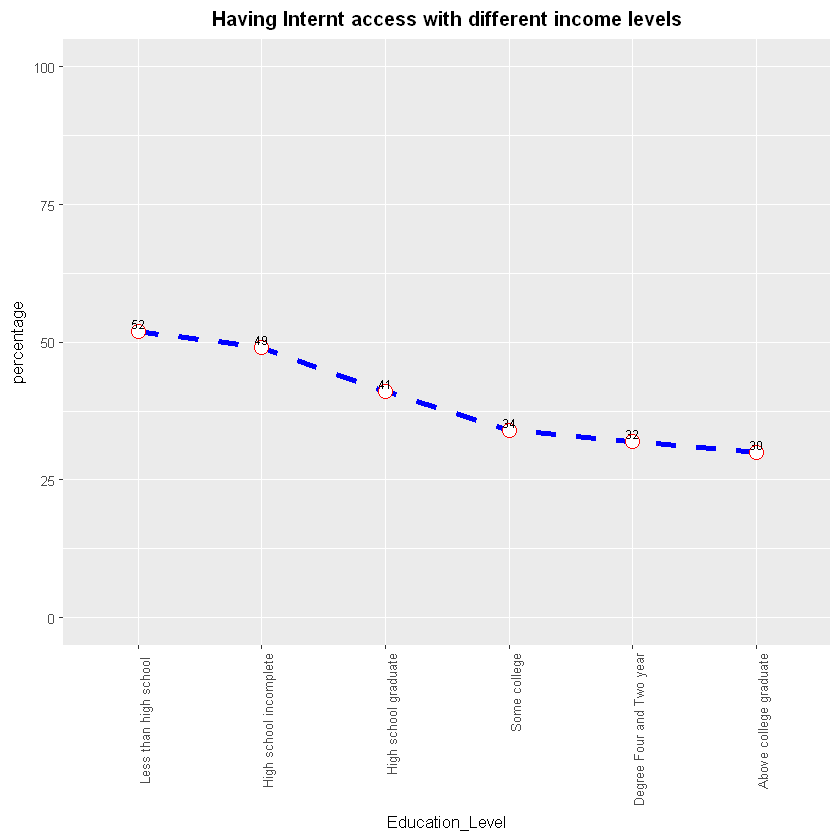

In [18]:
ggplot(data=percentageAnswered, aes(x=Education_Level, y=percentage,group=1),cex.names=0.20) +
geom_line(stat="identity",linetype="dashed", size=1.5,colour="blue",)+
geom_point(colour="red", size=4, shape=21, fill="white")+
coord_cartesian(ylim=c(0,100))+
geom_text(aes(label=percentage), vjust=-0.3, size=2.5)+
theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))+ 
ggtitle("Having Internt access with different income levels") + 
theme(plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))

#### Description: <br/>
Percent of people who disagree to the opinion in each catogery of people of different education level<br/>
For instance : 36% of people with education less than high school disagree to the opinion.

#### Hypothesis :
People with higher education tend to disagree with the opinion that online dating keeps people from settling down because they always have options for people to date,<br/>
Since the more people get educated, their maturity about a relation tend to increase proportinally for most of them.<br/>
Hence, the best match on online dating should be more educated one.


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Q3? Major reason why Graduates and above dont use smart phones?

######  Steps : Cleaning and Munging <br/>
1) Select only the required columns:  Education_Level / Sample id / NoSmartPhones/age_Interval <br/><br/>
2) Filter the data with people who have not answered to question on reason not to use smart phone and their education level<br/><br/>

In [19]:
WhyNoSmartphones=select(gjbfactorize,sampleid,NoSmartPhones,Education_Level,age_Interval)%>%
filter(NoSmartPhones!= "Other", Education_Level!="Don't know",Education_Level!="Refused",NoSmartPhones!="Don't know",NoSmartPhones!="Refused",NoSmartPhones!="No reason") %>%
na.omit()

In [20]:
head(WhyNoSmartphones)

sampleid,NoSmartPhones,Education_Level,age_Interval
100011,Don’t need one,Less than high school,older (65+)
100049,Only use phone for calling,Degree Four and Two year,older (65+)
100051,Plan to get one,Some college,older (65+)
100059,Don’t need one,High school graduate,older (65+)
100065,Too expensive (general),High school graduate,older (65+)
100096,not interested,Degree Four and Two year,older (65+)


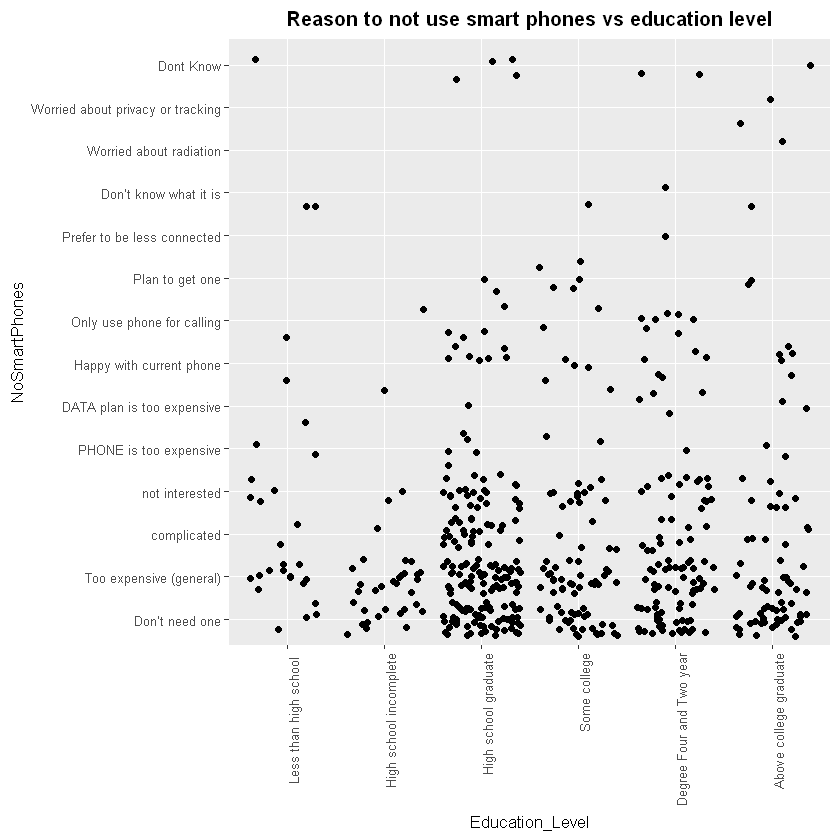

In [21]:
qplot(Education_Level,NoSmartPhones, data=WhyNoSmartphones, geom="jitter")+
theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))+ 
ggtitle("Reason to not use smart phones vs education level") + 
theme(plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))

###### Description:
<br/>We can observe that jitter is mostly concentrated at the base of the bucket which labels that most people in education level above high school graduate dont prefer smart phones because they think its either too expensive or they dont need one.

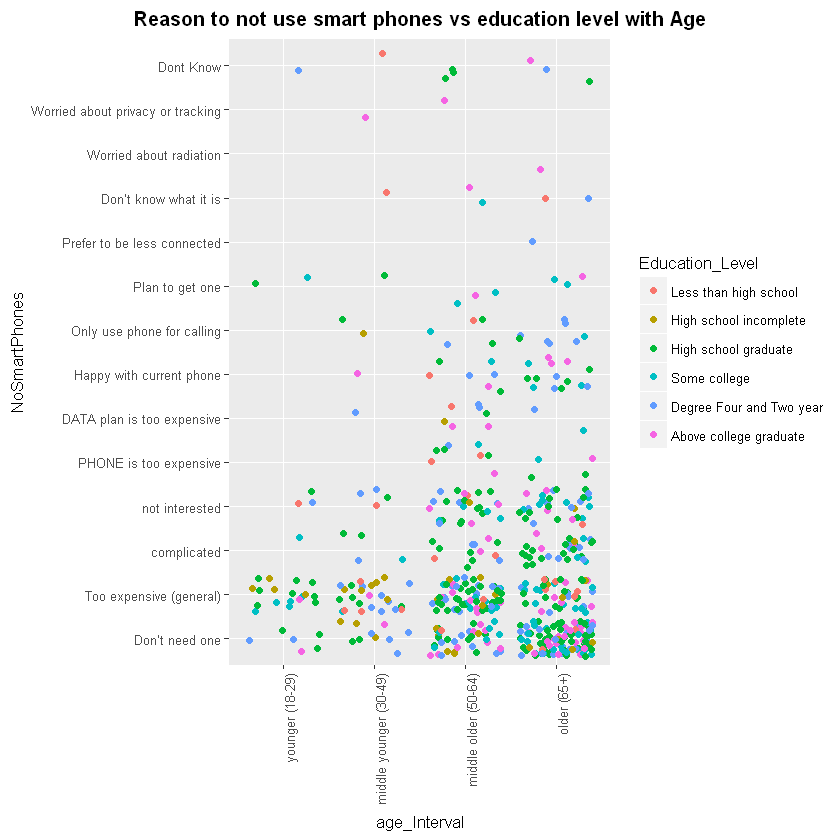

In [22]:
qplot(age_Interval,NoSmartPhones,colour=Education_Level, data=WhyNoSmartphones, geom="jitter")+
theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))+ 
ggtitle("Reason to not use smart phones vs education level with Age") + 
theme(plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))

#### Description: <br/>
Visualization of age and Education level as a factor of reason to not use smart phones.

###### Hypothesis:
<br/>We can observe that whatever be the sample size of data, most of the people with age below  65 and education below high school graduate dont use smart phone because they think its too expensive while peiple with age 65 and education above high school graduate mostly think smart phone is not necessary because they dont need one.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------`

# Q4: Are people with high speed connection not likely to have tv connection at home ?<br/><br/>

######  Steps : Cleaning and Munging <br/>
1) Select only the required columns:  Education_Level / Type_of_Net / Television_Connection<br/><br/>
2) Filter the data with people who have who didnot answer.<br/><br/>
3) omit NA.

In [23]:
WhyNoTV=select(gjbfactorize,sampleid,Type_of_Net,Television_Connection)%>%
filter(Type_of_Net!="Dont know",Type_of_Net!="Refused",Television_Connection!="Dont know",Television_Connection!="Refused") %>%
# group_by(NoSmartPhones,Education_Level)%>%
na.omit()

Group People who have and who dont have television connection with respect to Type of internet connection.<br/>
Also, count the number of people with yes and no answers in each goup

In [24]:
WhyNoTV=group_by(WhyNoTV,Type_of_Net,Television_Connection)%>%
summarize(count=n())
WhyNoTV

Type_of_Net,Television_Connection,count
Dial-up,Yes,4
Dial-up,No,3
Higher-speed,Yes,146
Higher-speed,No,87
Both,Yes,1
use Cellphone,Yes,1
No internet access,Yes,1
No internet access,No,2


###### Plot the data as bar chart, each bar stating what count of individuals in each catogery have and dont have telivision connection

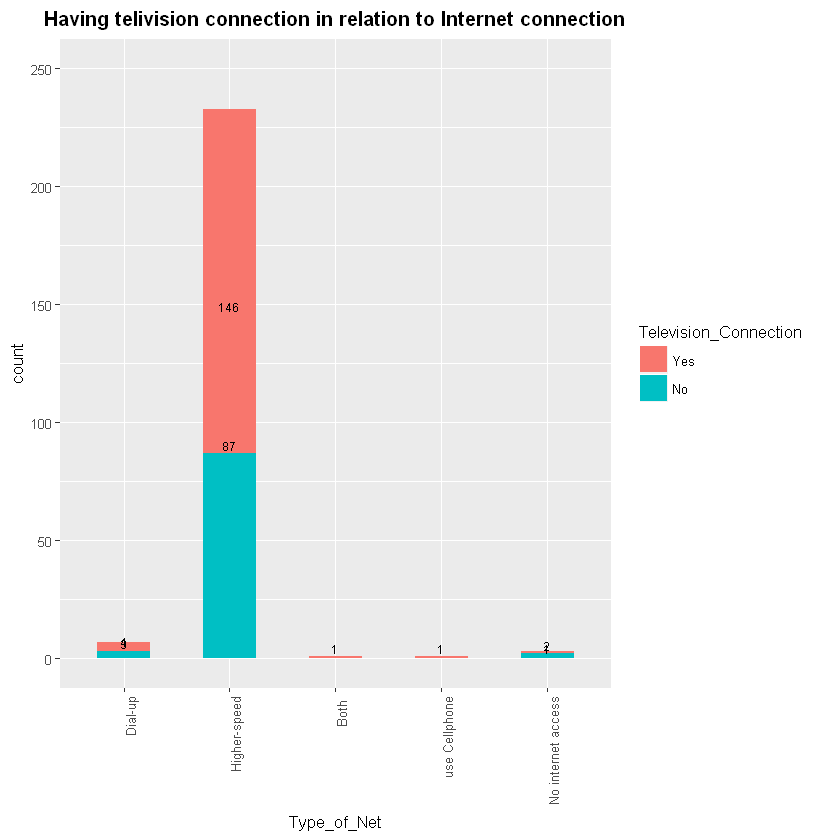

In [25]:
ggplot(data=WhyNoTV, aes(x=Type_of_Net,y=count,fill=Television_Connection,width=.5),cex.names=0.20) +
geom_bar(stat="identity")+
coord_cartesian(ylim=c(0,250))+
geom_text(aes(label=count), vjust=-0.3, size=2.5)+
theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))+ 
ggtitle("Having telivision connection in relation to Internet connection") + 
theme(plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))

###### Description: <br/>
Count of people with internet connection of different type with having or not having Telivision connection
For instance : 87 people have high speed internet connection and dont have Telivision

#### Hypothesis :
It is clear that even though people have higher net connectivity, they do have Telivision connectionas well,<br/>
146 count on people have high speed internet access at home and have telivision connection, as compated to 87 who dont We may conclude that over the net telivision services have not been able to eradicate peoples love for telivision.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------`

# Q5 : Do women and men hold varying opinion about voilence induced by violent games?


######  Steps : Cleaning and Munging <br/>
1) Select only the required columns:  sex / Violentgames<br/><br/>
2) Filter the data with people who have who didnot answer.<br/><br/>
3) omit NA.

In [26]:
violenceNgame=select(gjbfactorize,sampleid,sex,Violentgames)%>%
filter(Violentgames!="Dont know",Violentgames!="Refused") %>%
# group_by(NoSmartPhones,Education_Level)%>%
na.omit()

Calculate the total count of male and female who answered that "People who play violent video games are more likely to be violent themselves" to cary out a percentage analysis.

In [27]:
count_gender=group_by(violenceNgame,sex)%>%
summarize(totalGender=n())%>%
rename(Gender=sex)

In [28]:
head(count_gender)

Gender,totalGender
Male,906
Female,916


I have carried a percentage based analysis since the number of male who answered are not same as the number of female.

In [29]:
violenceNgame=group_by(violenceNgame,Gender=sex,Violentgames)%>%
summarize(count=n())


In [30]:
violenceNgame

Gender,Violentgames,count
Male,Agree,328
Male,Disagree,578
Female,Agree,501
Female,Disagree,415


In [31]:
violenceNgame=right_join(count_gender,violenceNgame,by="Gender")
violenceNgame=mutate(violenceNgame,Percentage=((count*100)/totalGender))
violenceNgame$Percentage<-round(violenceNgame$Percentage)
violenceNgame

Gender,totalGender,Violentgames,count,Percentage
Male,906,Agree,328,36
Male,906,Disagree,578,64
Female,916,Agree,501,55
Female,916,Disagree,415,45


The data now speaks that :Only 36% of Male agree that "People who play violent video games are more likely to be violent themselves"

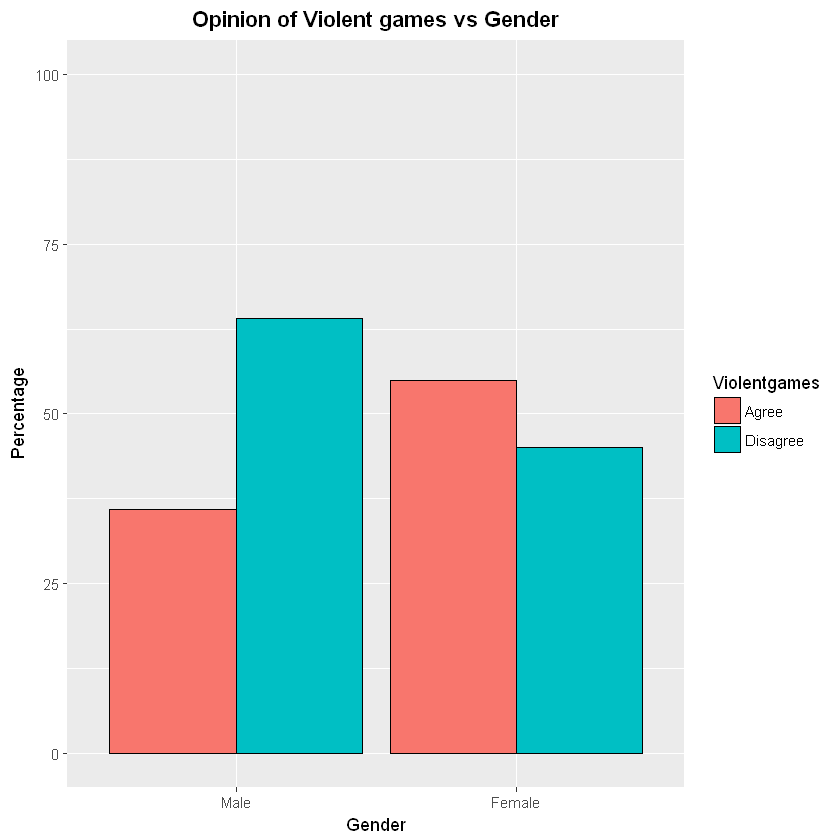

In [32]:
ggplot(data=violenceNgame, aes(x=Gender, y=Percentage, fill=Violentgames),width=5,cex.names=0.20) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")+
coord_cartesian(ylim=c(0,100))+ 
ggtitle("Opinion of Violent games vs Gender") + 
theme(plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))


###### Description: <br/>
Bar plot of how many percent of male and female agreed and disagreed to the opinion that "People who play violent video games are more likely to be violent themselves"

#### Hypothesis :
It is clear that 55 percent of women agree with that people become violent ,<br/>
While only 36 percent of men agree that people become violent by playing violent games.<br/>
Clearly, men and women have different perspective of playing violent games, it can be because women have lesser tendency to play violent games.